In [10]:
import pandas as pd 
import numpy as np

In [11]:
po2_data = pd.read_csv('po2_data.csv')

In [12]:
po2_data.head()

,subject#,age,sex,test_time,motor_updrs,total_updrs,jitter(%),jitter(abs),jitter(rap),jitter(ppq5),...,shimmer(abs),shimmer(apq3),shimmer(apq5),shimmer(apq11),shimmer(dda),nhr,hnr,rpde,dfa,ppe
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [13]:
po2_data.shape

(5875, 22)

In [14]:
po2_data.columns

Index(['subject#', 'age', 'sex', 'test_time', 'motor_updrs', 'total_updrs',
       'jitter(%)', 'jitter(abs)', 'jitter(rap)', 'jitter(ppq5)',
       'jitter(ddp)', 'shimmer(%)', 'shimmer(abs)', 'shimmer(apq3)',
       'shimmer(apq5)', 'shimmer(apq11)', 'shimmer(dda)', 'nhr', 'hnr', 'rpde',
       'dfa', 'ppe'],
      dtype='object')

In [15]:
po2_data.isnull().sum()

subject#          0
age               0
sex               0
test_time         0
motor_updrs       0
total_updrs       0
jitter(%)         0
jitter(abs)       0
jitter(rap)       0
jitter(ppq5)      0
jitter(ddp)       0
shimmer(%)        0
shimmer(abs)      0
shimmer(apq3)     0
shimmer(apq5)     0
shimmer(apq11)    0
shimmer(dda)      0
nhr               0
hnr               0
rpde              0
dfa               0
ppe               0
dtype: int64

In [16]:
correlation_matrix = po2_data.corr()

In [17]:
po2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   subject#        5875 non-null   int64  
 1   age             5875 non-null   int64  
 2   sex             5875 non-null   int64  
 3   test_time       5875 non-null   float64
 4   motor_updrs     5875 non-null   float64
 5   total_updrs     5875 non-null   float64
 6   jitter(%)       5875 non-null   float64
 7   jitter(abs)     5875 non-null   float64
 8   jitter(rap)     5875 non-null   float64
 9   jitter(ppq5)    5875 non-null   float64
 10  jitter(ddp)     5875 non-null   float64
 11  shimmer(%)      5875 non-null   float64
 12  shimmer(abs)    5875 non-null   float64
 13  shimmer(apq3)   5875 non-null   float64
 14  shimmer(apq5)   5875 non-null   float64
 15  shimmer(apq11)  5875 non-null   float64
 16  shimmer(dda)    5875 non-null   float64
 17  nhr             5875 non-null   f

In [18]:
! pip install seaborn matplotlib

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

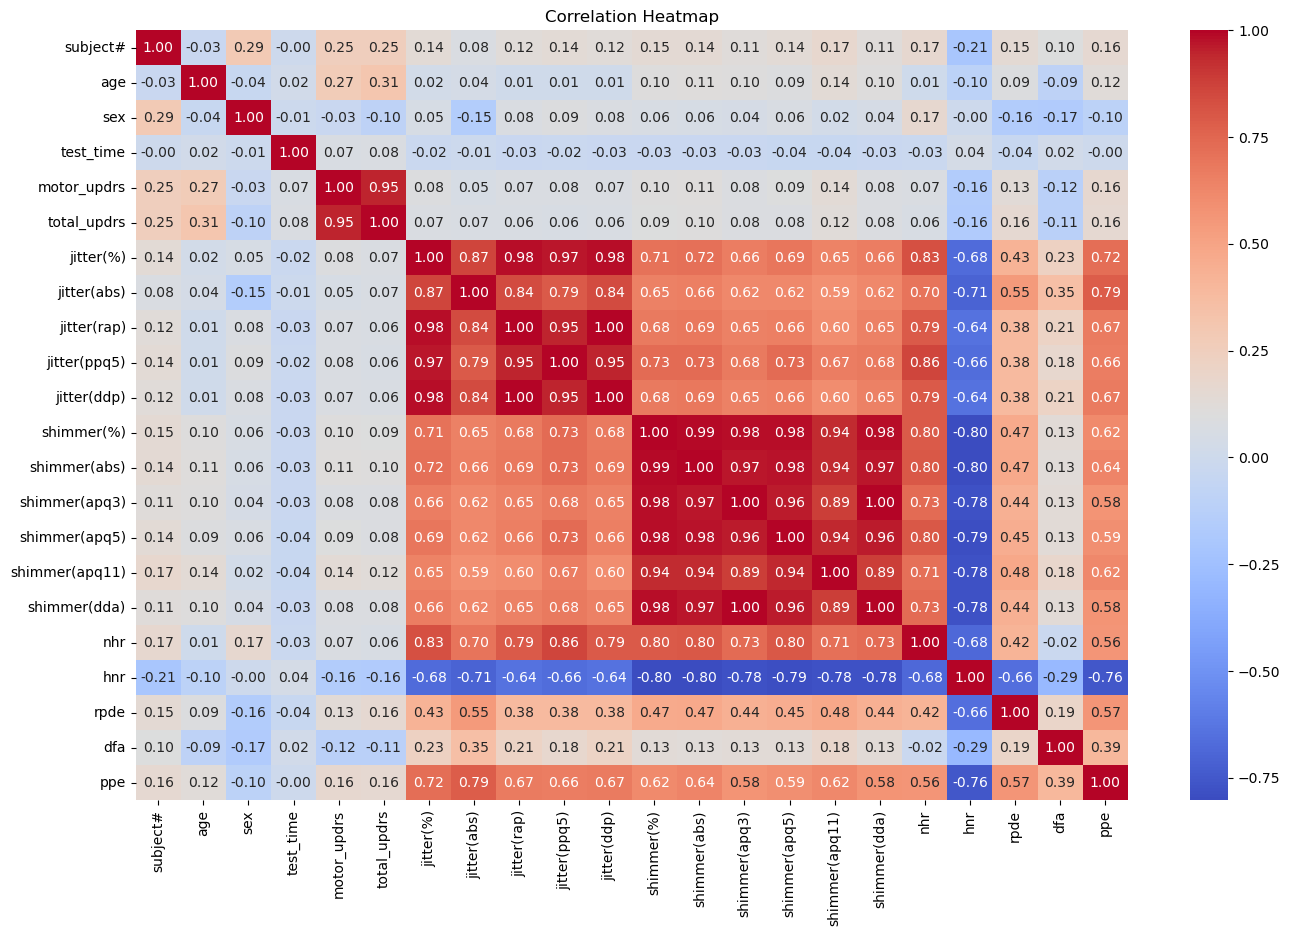

In [20]:
plt.figure(figsize=(16, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [21]:
po2_data_refined = po2_data.drop(columns=['sex','hnr','dfa'])

In [22]:
po2_data_refined.shape

(5875, 19)

In [23]:
for name in po2_data_refined:
    i = po2_data_refined[name].skew()
    print(f"{name} ={i}")

subject# =0.00299635164361715
age =-0.379133424685429
test_time =0.07772019045894822
motor_updrs =0.07524827892585423
total_updrs =0.27105334561788413
jitter(%) =6.451845746842887
jitter(abs) =3.283075431594987
jitter(rap) =6.945437976681228
jitter(ppq5) =7.5862054748225205
jitter(ddp) =6.945375724953423
shimmer(%) =3.3127926288385234
shimmer(abs) =3.099220673599895
shimmer(apq3) =3.0972229983046105
shimmer(apq5) =3.698061291183199
shimmer(apq11) =3.406958472086733
shimmer(dda) =3.0972240478371647
nhr =6.549122619401026
rpde =-0.037434386689665936
ppe =1.0908188972893038


In [24]:
import seaborn as sns

C:\Users\Miracle\AppData\Local\Temp\ipykernel_22364\2707805814.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(po2_data_refined[name])
C:\Users\Miracle\AppData\Local\Temp\ipykernel_22364\2707805814.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(po2_data_refined[name])
C:\Users\Miracle\A

C:\Users\Miracle\AppData\Local\Temp\ipykernel_22364\2707805814.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(po2_data_refined[name])
C:\Users\Miracle\AppData\Local\Temp\ipykernel_22364\2707805814.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(po2_data_refined[name])


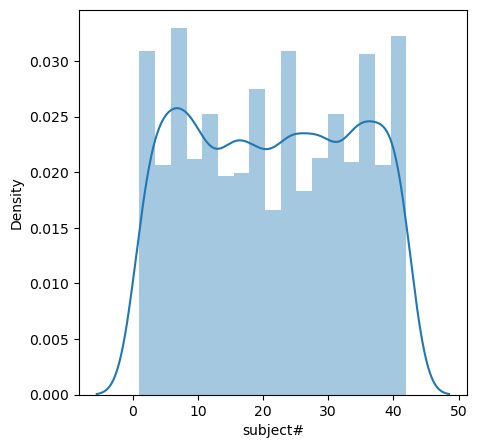

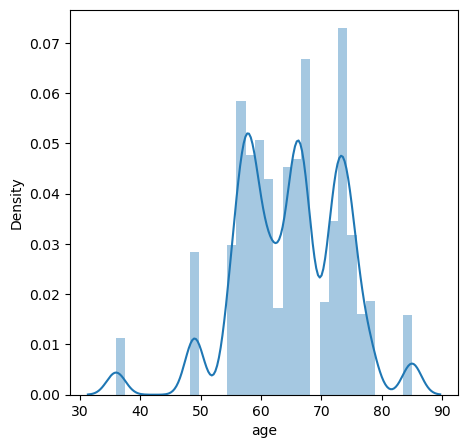

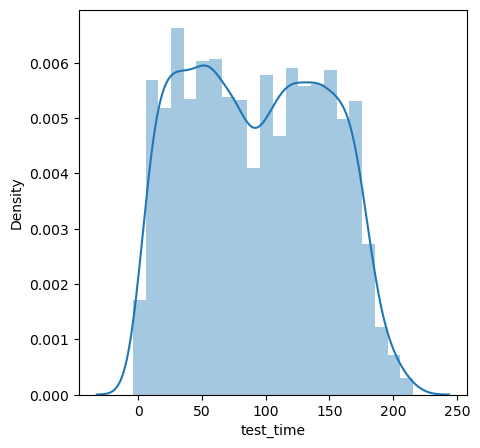

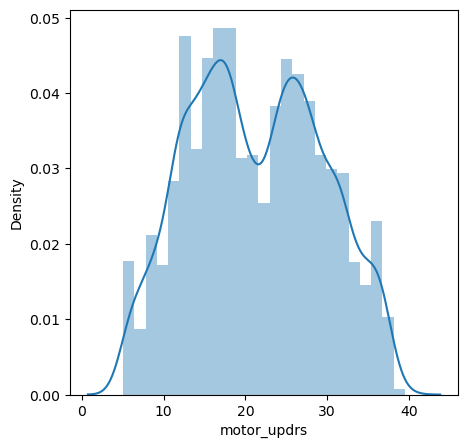

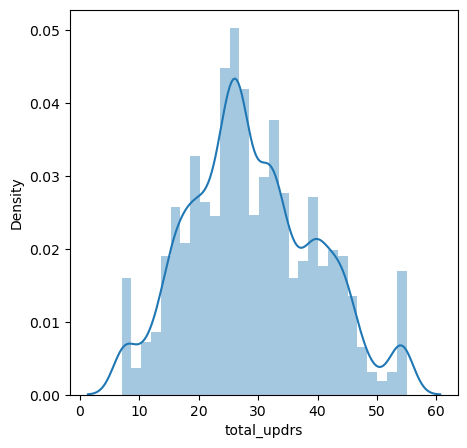

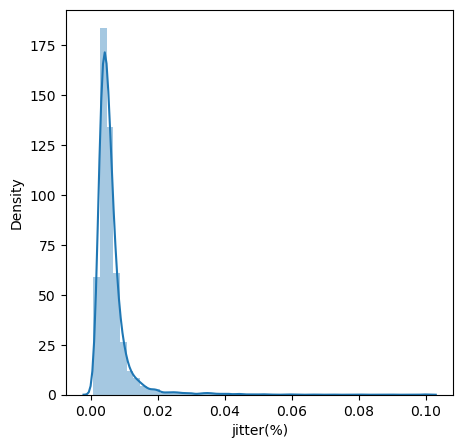

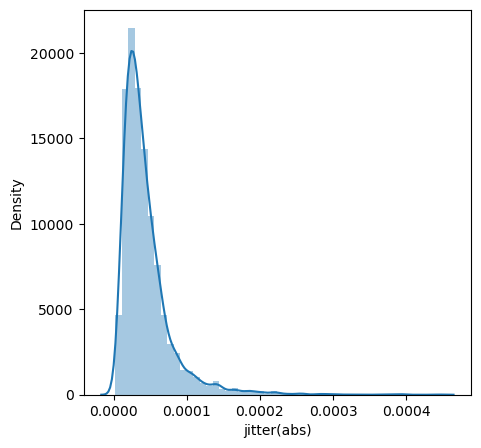

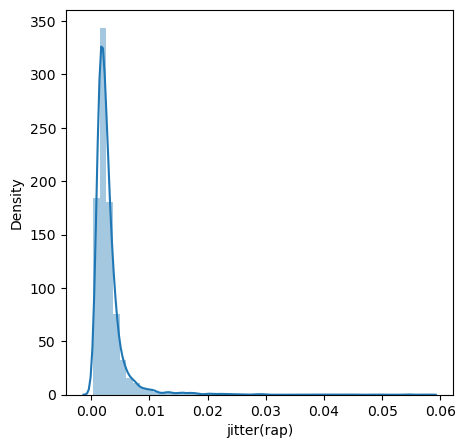

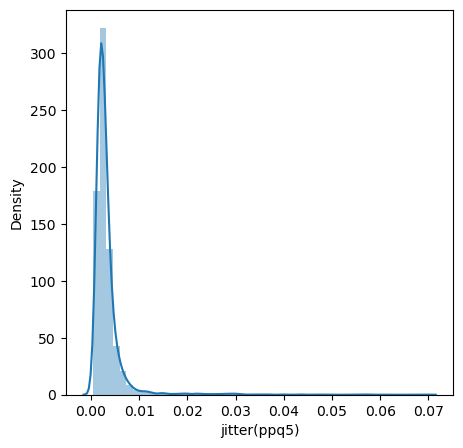

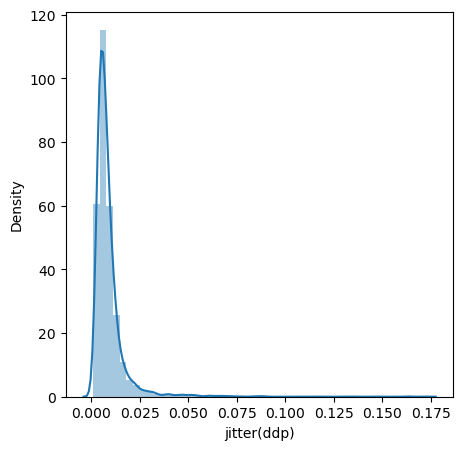

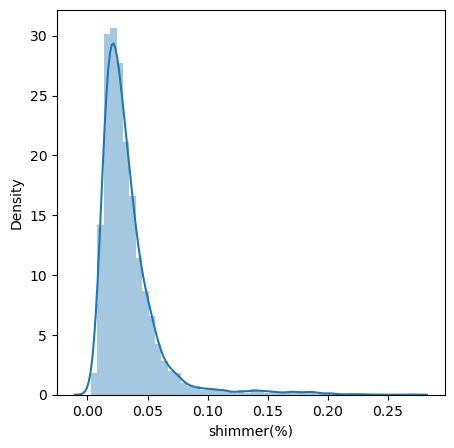

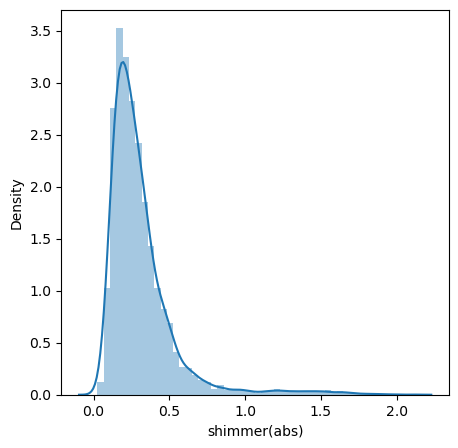

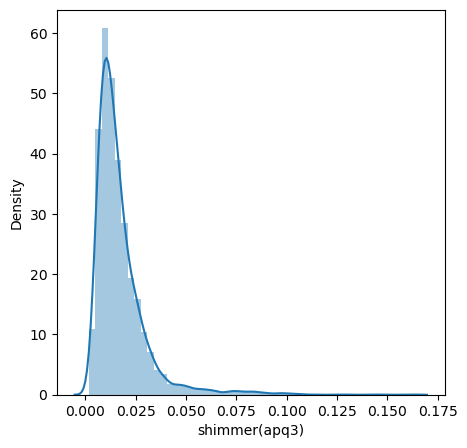

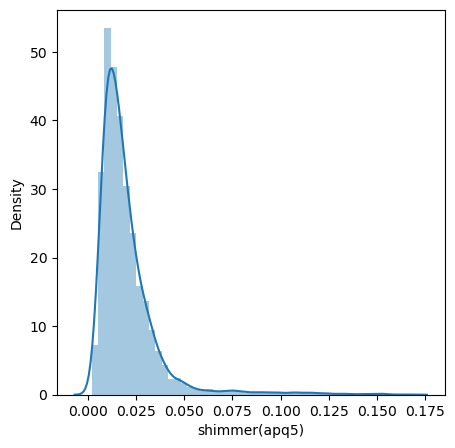

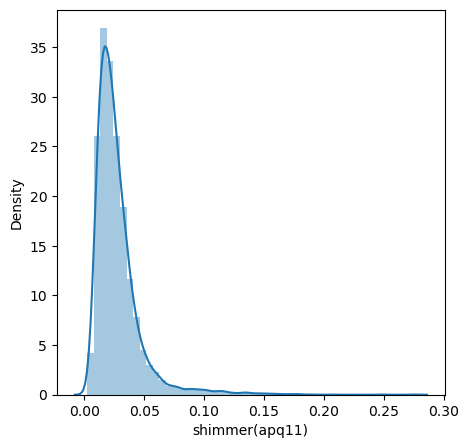

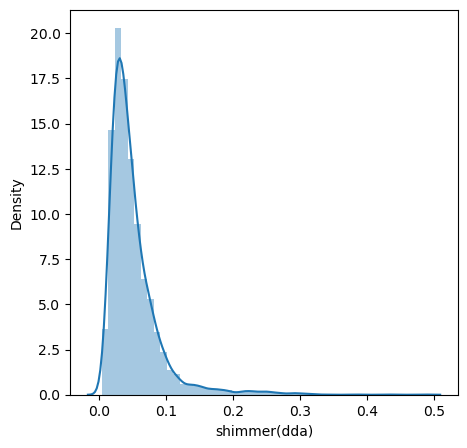

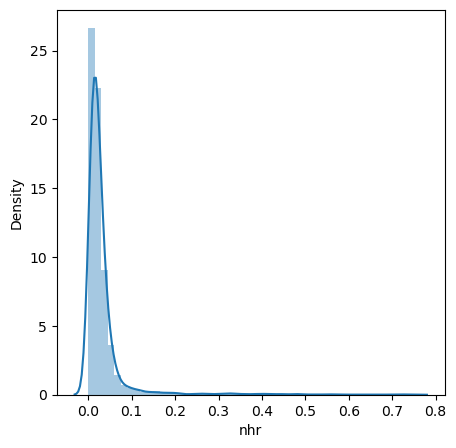

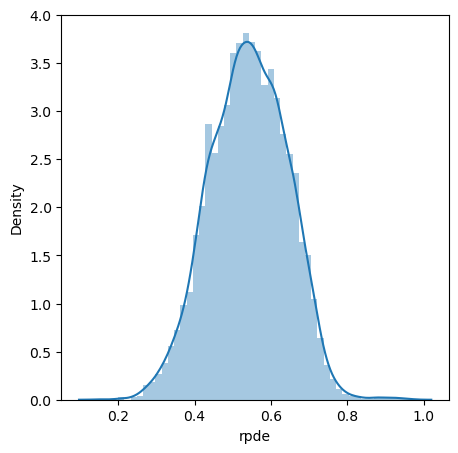

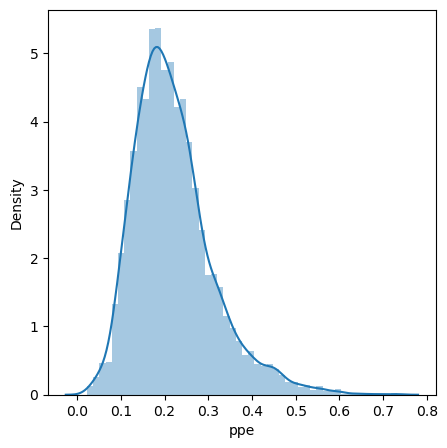

In [25]:
for name in po2_data_refined:
    plt.figure(figsize=(5,5))
    sns.distplot(po2_data_refined[name])

In [26]:

data_limits = {}

for name in po2_data_refined.columns:
    # Calculate the 25th and 75th percentiles
    percentile_25 = po2_data_refined[name].quantile(0.25)
    percentile_75 = po2_data_refined[name].quantile(0.75)
    
    # Calculate the IQR
    iqr = percentile_75 - percentile_25
    
    # Calculate the lower and upper limits
    lower_limit = percentile_25 - 1.5 * iqr
    upper_limit = percentile_75 + 1.5 * iqr
    
    data_limits[name] = {
        'IQR': iqr,
        'Lower Limit': lower_limit,
        'Upper Limit': upper_limit
    }

# Now, 'data_limits' contains the IQR, Lower Limit, and Upper Limit for each column
      

In [27]:
data_limits


{'subject#': {'IQR': 23.0, 'Lower Limit': -24.5, 'Upper Limit': 67.5},
 'age': {'IQR': 14.0, 'Lower Limit': 37.0, 'Upper Limit': 93.0},
 'test_time': {'IQR': 91.5975,
  'Lower Limit': -90.54875000000001,
  'Upper Limit': 275.84125},
 'motor_updrs': {'IQR': 12.596499999999999,
  'Lower Limit': -3.8947499999999984,
  'Upper Limit': 46.491249999999994},
 'total_updrs': {'IQR': 15.028000000000002,
  'Lower Limit': -1.171000000000003,
  'Upper Limit': 58.941},
 'jitter(%)': {'IQR': 0.0032199999999999998,
  'Lower Limit': -0.0012499999999999994,
  'Upper Limit': 0.011629999999999998},
 'jitter(abs)': {'IQR': 3.0900000000000006e-05,
  'Lower Limit': -2.391500000000001e-05,
  'Upper Limit': 9.968500000000002e-05},
 'jitter(rap)': {'IQR': 0.00171,
  'Lower Limit': -0.000985,
  'Upper Limit': 0.005855},
 'jitter(ppq5)': {'IQR': 0.00164,
  'Lower Limit': -0.0006399999999999999,
  'Upper Limit': 0.00592},
 'jitter(ddp)': {'IQR': 0.0051400000000000005,
  'Lower Limit': -0.002980000000000001,
  'Upp

In [28]:

# excluding these columns because they are normally distributed
columns_to_exclude = ['subject#', 'age', 'test_time','motor_updrs','total_updrs','rpde'] 
for name in po2_data_refined.columns:
    column_data = po2_data_refined[name]
    
    # Check if the current column should be excluded from outlier removal
    if name in columns_to_exclude:
        continue
    
    # Retrieve the lower and upper limits from data_limits dictionary
    lower_limit = data_limits[name]['Lower Limit']
    upper_limit = data_limits[name]['Upper Limit']
    
    # Find outliers by checking which values fall outside the limits
    outliers_mask = (column_data < lower_limit) | (column_data > upper_limit)
    
    # Remove outliers from the DataFrame
    po2_data_refined = po2_data_refined[~outliers_mask]

# Now, 'po2_data_refined' contains the data with outliers removed, except for the specified columns


In [29]:
po2_data_refined.describe()

,subject#,age,test_time,motor_updrs,total_updrs,jitter(%),jitter(abs),jitter(rap),jitter(ppq5),jitter(ddp),shimmer(%),shimmer(abs),shimmer(apq3),shimmer(apq5),shimmer(apq11),shimmer(dda),nhr,rpde,ppe
count,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000
mean,20.955888,64.698306,93.332409,21.063125,28.797758,0.004814,0.000035,0.002258,0.002466,0.006775,0.027519,0.251444,0.013920,0.016144,0.022611,0.041761,0.018944,0.525128,0.197531
std,12.282395,8.954724,53.291868,8.284532,10.974875,0.001870,0.000018,0.001003,0.000991,0.003008,0.012287,0.111314,0.006924,0.007783,0.010218,0.020771,0.012040,0.093232,0.066919
min,1.000000,36.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,0.000980,0.003060,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,0.151020,0.021983
25%,10.000000,58.000000,47.430000,14.434000,20.797000,0.003410,0.000021,0.001490,0.001730,0.004470,0.018082,0.166000,0.008680,0.010200,0.014770,0.026042,0.009876,0.459132,0.148952
50%,21.000000,65.000000,93.402500,20.445000,27.298000,0.004520,0.000031,0.002060,0.002290,0.006190,0.025045,0.231000,0.012400,0.014560,0.020815,0.037195,0.016434,0.527270,0.192435
75%,31.000000,72.000000,138.870000,27.663000,36.464000,0.005950,0.000046,0.002850,0.003067,0.008560,0.034807,0.318000,0.017750,0.020708,0.028745,0.053257,0.025367,0.594483,0.242188
max,42.000000,85.000000,215.490000,39.511000,54.992000,0.011380,0.000098,0.005820,0.005870,0.017460,0.070280,0.646000,0.037380,0.043110,0.058030,0.112130,0.062223,0.771250,0.418520


In [30]:
po2_data_refined.shape

(5078, 19)

In [31]:
po2_data.describe()

,subject#,age,sex,test_time,motor_updrs,total_updrs,jitter(%),jitter(abs),jitter(rap),jitter(ppq5),...,shimmer(abs),shimmer(apq3),shimmer(apq5),shimmer(apq11),shimmer(dda),nhr,hnr,rpde,dfa,ppe
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [32]:
po2_data.shape

(5875, 22)

In [33]:
po2_data.isnull().sum()

subject#          0
age               0
sex               0
test_time         0
motor_updrs       0
total_updrs       0
jitter(%)         0
jitter(abs)       0
jitter(rap)       0
jitter(ppq5)      0
jitter(ddp)       0
shimmer(%)        0
shimmer(abs)      0
shimmer(apq3)     0
shimmer(apq5)     0
shimmer(apq11)    0
shimmer(dda)      0
nhr               0
hnr               0
rpde              0
dfa               0
ppe               0
dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer

In [35]:
X = po2_data_refined.drop(['motor_updrs','total_updrs'],axis=1)
y_motor = po2_data_refined['motor_updrs']
y_total = po2_data_refined['total_updrs']

In [36]:
X.shape,y_motor.shape,y_total.shape

((5078, 17), (5078,), (5078,))

In [37]:
# Splitting the data into training and testing sets
X_train,X_test,y_motor_train,y_motor_test,y_total_train,y_total_test = train_test_split(X,y_motor,y_total,test_size=0.2,random_state=42)

In [38]:
# # Standardization scales the features (independent variables) of a dataset to have a mean of 0 and a standard deviation of 1

scaler = StandardScaler()

# fitting the scalar to the train set

scaler.fit(X_train)

# transform train and test sets 
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:

# #creating transformers
# motor_transformer = PowerTransformer(method='yeo-johnson', standardize=False)
# total_transformer = PowerTransformer(method='yeo-johnson', standardize=False)
# # Fit and transform the target variables
# y_motor_train_transformed = motor_transformer.fit_transform(y_motor_train.values.reshape(-1, 1))
# y_motor_test_transformed = motor_transformer.transform(y_motor_test.values.reshape(-1, 1))

# y_total_train_transformed = total_transformer.fit_transform(y_total_train.values.reshape(-1, 1))
# y_total_test_transformed = total_transformer.transform(y_total_test.values.reshape(-1, 1))


In [40]:
# Checking the effects of scaling 

# before scaling 
# X_train.describe()

In [41]:
# after scaling
# pd.DataFrame(X_train_scaled).describe()

In [42]:
# pd.DataFrame(X_train_scaled)

In [44]:
# Create and train a linear regression model for Motor UPDRS
motor_model = LinearRegression()
motor_model.fit(X_train_scaled, y_motor_train)

LinearRegression()

In [46]:
# Predict Motor UPDRS scores on the test set
motor_predictions = motor_model.predict(X_test_scaled)

In [47]:
motor_predictions

array([21.12019533, 27.11793203, 20.2485352 , ..., 26.2777669 ,
       22.79957059, 21.77207781])

In [48]:
# Evaluate the Motor UPDRS model
mae_motor = mean_absolute_error(y_motor_test, motor_predictions)
mse_motor = mean_squared_error(y_motor_test, motor_predictions)
r2_motor = r2_score(y_motor_test, motor_predictions)
print("Motor UPDRS Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_motor}")
print(f"Mean Squared Error (MSE): {mse_motor}")
print(f"R-squared (R2): {r2_motor}")

Motor UPDRS Model Evaluation:
Mean Absolute Error (MAE): 6.708505591253889
Mean Squared Error (MSE): 60.210535023010124
R-squared (R2): 0.1480987885040077


In [50]:
# Create and train a linear regression model for Total UPDRS
total_model = LinearRegression()
total_model.fit(X_train_scaled, y_total_train)

LinearRegression()

In [51]:
# Predict Total UPDRS scores on the test set
total_predictions = total_model.predict(X_test_scaled)

In [52]:
total_predictions

array([28.02773936, 35.69590964, 26.52663389, ..., 34.97921543,
       31.17234348, 31.80125206])

In [53]:
# Evaluate the Total UPDRS model

#MAE measures the average absolute difference between the actual (observed) values and the predicted values.
#It gives you an idea of how far off your model's predictions are from the actual values on average.
#Lower MAE indicates better model performance, and MAE is in the same units as the target variable.
mae_total = mean_absolute_error(y_total_test, total_predictions)

#MSE measures the average squared difference between the actual values and the predicted values.
#It emphasizes larger errors more than MAE because it squares the differences.
#MSE is also in the squared units of the target variable.
mse_total = mean_squared_error(y_total_test, total_predictions)

#R2 measures the proportion of the variance in the target variable that is predictable from the independent variables (features).
#R2 ranges from 0 to 1, where 1 indicates a perfect fit (the model explains all the variance), and 0 indicates that the model doesn't explain any variance.
#It provides a sense of how well the model fits the data relative to a simple mean-based model.
r2_total = r2_score(y_total_test, total_predictions)

#Lower MAE and MSE values indicate better model accuracy.
#A higher R2 score suggests that your model explains a larger portion of the variance in the target variable.

print("\nTotal UPDRS Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_total}")
print(f"Mean Squared Error (MSE): {mse_total}")
print(f"R-squared (R2): {r2_total}")


Total UPDRS Model Evaluation:
Mean Absolute Error (MAE): 8.608085480620595
Mean Squared Error (MSE): 104.72448232248738
R-squared (R2): 0.17763748425964387


# Actual vs. Predicted Motor UPDRS Scores 

The code provided generates two types of plots to visualize the performance of a predictive model for motor UPDRS scores: a simple scatter plot and a detailed plot with residuals. Let's explain each of these plots:

Simple Scatter Plot:

In the simple scatter plot, the x-axis represents the actual motor UPDRS scores (ground truth), and the y-axis represents the predicted Total UPDRS scores generated by your regression model.
Each point on the scatter plot represents a data point from your test dataset.
The ideal scenario is for all points to lie along a straight diagonal line from the bottom-left corner to the top-right corner (the line y=x). This diagonal line represents a perfect prediction where the predicted and actual values are identical.
In the scatter plot, data points that are close to this diagonal line indicate accurate predictions, while points that deviate from the line represent prediction errors.
Detailed Plot with Residuals:

This plot provides a more detailed view of the model's performance.
The left subplot is similar to the simple scatter plot but includes additional details:
It shows the actual motor UPDRS scores on the x-axis and the predicted scores on the y-axis.
The diagonal dashed line (y=x) represents a perfect prediction.
Data points that fall along or close to this line have accurate predictions.
Deviation from the line indicates prediction errors.
The right subplot is called a "Residual Plot":
It shows the actual motor UPDRS scores on the x-axis and the residuals (the differences between actual and predicted scores) on the y-axis.
The horizontal dashed line at y=0 represents zero error or perfect prediction.
Points above the line indicate overestimation (positive residuals), and points below the line indicate underestimation (negative residuals).
The distribution of residuals helps you understand whether your model tends to systematically overpredict or underpredict Total UPDRS scores.
In both plots, the goal is to visually assess how well the model's predictions align with the actual values. Ideally, you want data points to cluster closely around the diagonal line in the left subplot and around the horizontal line at y=0 in the right subplot.

A well-performing model will have points that are evenly distributed around these lines, indicating accurate predictions with minimal bias and variability. Deviations from these lines may suggest areas for model improvement.







In [ ]:
import matplotlib.pyplot as plt

# Simple Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_motor_test, motor_predictions, alpha=0.7)
plt.xlabel("Actual Motor UPDRS Scores")
plt.ylabel("Predicted Motor UPDRS Scores")
plt.title("Actual vs. Predicted Motor UPDRS Scores (Simple)")

plt.show()

# Detailed Plot with Residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_motor_test, motor_predictions, alpha=0.7)
plt.plot([min(y_motor_test), max(y_motor_test)], [min(y_motor_test), max(y_motor_test)], 'k--', lw=2)
plt.xlabel("Actual Motor UPDRS Scores")
plt.ylabel("Predicted Motor UPDRS Scores")
plt.title("Actual vs. Predicted Motor UPDRS Scores (Detailed)")
plt.grid(True)

# Residual Plot
residuals = y_motor_test - motor_predictions
plt.subplot(1, 2, 2)
plt.scatter(y_motor_test, residuals, alpha=0.7)
plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.xlabel("Actual Motor UPDRS Scores")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)

plt.tight_layout()
plt.show()


#  Actual vs. Predicted Total UPDRS Scores
The code provided generates two types of plots to visualize the performance of a predictive model for Total UPDRS scores: a simple scatter plot and a detailed plot with residuals. Let's explain each of these plots:

Simple Scatter Plot:

In the simple scatter plot, the x-axis represents the actual Total UPDRS scores (ground truth), and the y-axis represents the predicted Total UPDRS scores generated by your regression model.
Each point on the scatter plot represents a data point from your test dataset.
The ideal scenario is for all points to lie along a straight diagonal line from the bottom-left corner to the top-right corner (the line y=x). This diagonal line represents a perfect prediction where the predicted and actual values are identical.
In the scatter plot, data points that are close to this diagonal line indicate accurate predictions, while points that deviate from the line represent prediction errors.
Detailed Plot with Residuals:

This plot provides a more detailed view of the model's performance.
The left subplot is similar to the simple scatter plot but includes additional details:
It shows the actual Total UPDRS scores on the x-axis and the predicted scores on the y-axis.
The diagonal dashed line (y=x) represents a perfect prediction.
Data points that fall along or close to this line have accurate predictions.
Deviation from the line indicates prediction errors.
The right subplot is called a "Residual Plot":
It shows the actual Total UPDRS scores on the x-axis and the residuals (the differences between actual and predicted scores) on the y-axis.
The horizontal dashed line at y=0 represents zero error or perfect prediction.
Points above the line indicate overestimation (positive residuals), and points below the line indicate underestimation (negative residuals).
The distribution of residuals helps you understand whether your model tends to systematically overpredict or underpredict Total UPDRS scores.
In both plots, the goal is to visually assess how well the model's predictions align with the actual values. Ideally, you want data points to cluster closely around the diagonal line in the left subplot and around the horizontal line at y=0 in the right subplot.

A well-performing model will have points that are evenly distributed around these lines, indicating accurate predictions with minimal bias and variability. Deviations from these lines may suggest areas for model improvement.







In [ ]:
# Simple Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_total_test, total_predictions, alpha=0.7)
plt.xlabel("Actual Total UPDRS Scores")
plt.ylabel("Predicted Total UPDRS Scores")
plt.title("Actual vs. Predicted Total UPDRS Scores (Simple)")

plt.show()

# Detailed Plot with Residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_total_test, total_predictions, alpha=0.7)
plt.plot([min(y_total_test), max(y_total_test)], [min(y_total_test), max(y_total_test)], 'k--', lw=2)
plt.xlabel("Actual Total UPDRS Scores")
plt.ylabel("Predicted Total UPDRS Scores")
plt.title("Actual vs. Predicted Total UPDRS Scores (Detailed)")
plt.grid(True)

# Residual Plot
residuals = y_total_test - total_predictions
plt.subplot(1, 2, 2)
plt.scatter(y_total_test, residuals, alpha=0.7)
plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.xlabel("Actual Total UPDRS Scores")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)

plt.tight_layout()
plt.show()
